In [65]:
import cv2
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from PIL import Image
from sklearn.svm import SVC

In [66]:
src = cv2.imread('Train/original_retinal_images/IDRiD_10.jpg', cv2.IMREAD_UNCHANGED)
label = Image.open('Train/masks_Hard_Exudates/IDRiD_10_EX.tif')
label = np.asarray(label)

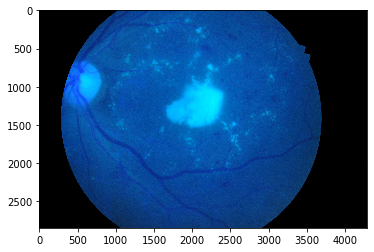

In [67]:
plt.imshow(src, cmap='gray')

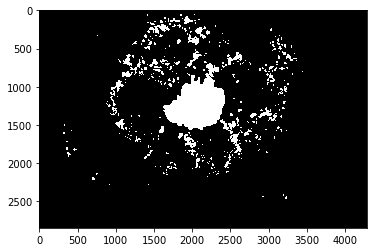

In [68]:
plt.imshow(label, cmap='gray')

(178, 268, 3)


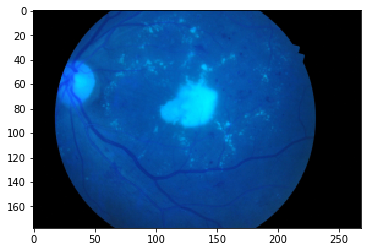

In [69]:
w_ratio = 0.5
h_ratio = 0.5
img = cv2.resize(src, (0,0), src, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
plt.imshow(img, cmap='gray')
print(img.shape)

In [70]:
(x, y, _) = img.shape
feature = []
labels = []
for i in range(0, x):
    for j in range(0, y):
        if i in [0,1] or i in [(x - 1), (x - 2)] or j in [0, 1] or j in [(y - 1), (y - 2)]:
            pass
        else:
            window = img[(i-2):(i+3),(j-2):(j+3)]
            #print(window.shape)
            r = []
            g = []
            b = []
            for row in range(window.shape[0]):
                for column in range(window.shape[1]):
                    pixel = window[row][column]
                    r.append(pixel[0])
                    g.append(pixel[1])
                    b.append(pixel[2])
            
            l = []
            meanR = np.mean(r)
            meanG = np.mean(g)
            meanB = np.mean(b)
            l.append(meanR)
            l.append(meanG)
            l.append(meanB)
            
            feature.append(l)
            labels.append(label[i][j])
            

In [71]:
files = ['11', '03', '25', '49']
for file in files:
    src = cv2.imread('Train/original_retinal_images/IDRiD_' + file + '.jpg', cv2.IMREAD_UNCHANGED)
    label = Image.open('Train/masks_Hard_Exudates/IDRiD_' + file + '_EX.tif')
    label = np.asarray(label)
    w_ratio = 0.5
    h_ratio = 0.5
    img = cv2.resize(src, (0,0), src, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    (x, y, _) = img.shape
    for i in range(0, x):
        for j in range(0, y):
            if i in [0,1] or i in [(x - 1), (x - 2)] or j in [0, 1] or j in [(y - 1), (y - 2)]:
                pass
            else:
                window = img[(i-2):(i+3),(j-2):(j+3)]
                #print(window.shape)
                r = []
                g = []
                b = []
                for row in range(window.shape[0]):
                    for column in range(window.shape[1]):
                        pixel = window[row][column]
                        r.append(pixel[0])
                        g.append(pixel[1])
                        b.append(pixel[2])

                l = []
                meanR = np.mean(r)
                meanG = np.mean(g)
                meanB = np.mean(b)
                l.append(meanR)
                l.append(meanG)
                l.append(meanB)

                feature.append(l)
                labels.append(label[i][j])

In [ ]:
clf = SVC(gamma='auto')
clf.fit(feature,labels)

In [ ]:
src = cv2.imread('Test/original_retinal_images/IDRiD_55.jpg', cv2.IMREAD_UNCHANGED)
label = Image.open('Test/masks_Hard_Exudates/IDRiD_55_EX.tif')
label = np.asarray(label)
w_ratio = 0.5
h_ratio = 0.5
img = cv2.resize(src, (0,0), src, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
(x, y, _) = img.shape
feature = []
labels = []
for i in range(0, x):
    for j in range(0, y):
        if i in [0,1] or i in [(x - 1), (x - 2)] or j in [0, 1] or j in [(y - 1), (y - 2)]:
            feature.append(img[i][j])
            labels.append(label[i][j])
        else:
            window = img[(i-2):(i+3),(j-2):(j+3)]
            #print(window.shape)
            r = []
            g = []
            b = []
            for row in range(window.shape[0]):
                for column in range(window.shape[1]):
                    pixel = window[row][column]
                    r.append(pixel[0])
                    g.append(pixel[1])
                    b.append(pixel[2])
            
            l = []
            meanR = np.mean(r)
            meanG = np.mean(g)
            meanB = np.mean(b)
            l.append(meanR)
            l.append(meanG)
            l.append(meanB)
            
            feature.append(l)
            labels.append(label[i][j])
print(len(feature))
print(len(labels))

In [ ]:
prediction = clf.predict(feature)
print(prediction.shape)

In [ ]:
picture = np.reshape(prediction, (178, 268))
plt.imshow(picture, cmap='gray')
#save the image!!

In [ ]:
a = np.array([1,2,3,4,5,6])
print(a.shape)
b = np.reshape(a, (2, 3))
print(b)

In [ ]:
print(len(prediction))
print(len(labels))
totalPixels = 0
correctPixels = 0
correctPrecision = 0
totalPrecision = 0
correctRecall = 0
totalRecall = 0
for index in range(len(prediction)):
    totalPixels += 1
    if prediction[index] == labels[index]:
        correctPixels += 1
    
    if prediction[index] == 1:
        totalPrecision += 1
        if labels[index] == 1:
            correctPrecision += 1
    
    if labels[index] == 1:
        totalRecall += 1
        if prediction[index] == 1:
            correctRecall += 1
    
acc = correctPixels / totalPixels
precision = correctPrecision/ totalPrecision
recall = correctRecall / totalRecall
print("accurracy is ", acc)
print("precision is ", precision)
print("recall is ", recall)

In [ ]:
totalPixels = 0
correctPixels = 0
correctPrecision = 0
totalPrecision = 0
correctRecall = 0
totalRecall = 0
files = ['55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67']
for file in files:
    src = cv2.imread('Test/original_retinal_images/IDRiD_'+file + '.jpg', cv2.IMREAD_UNCHANGED)
    label = Image.open('Test/masks_Hard_Exudates/IDRiD_'+file+'_EX.tif')
    label = np.asarray(label)
    w_ratio = 0.5
    h_ratio = 0.5
    img = cv2.resize(src, (0,0), src, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    (x, y, _) = img.shape
    feature = []
    labels = []
    for i in range(0, x):
        for j in range(0, y):
            if i in [0,1] or i in [(x - 1), (x - 2)] or j in [0, 1] or j in [(y - 1), (y - 2)]:
                feature.append(img[i][j])
                labels.append(label[i][j])
            else:
                window = img[(i-2):(i+3),(j-2):(j+3)]
            #print(window.shape)
                r = []
                g = []
                b = []
                for row in range(window.shape[0]):
                    for column in range(window.shape[1]):
                        pixel = window[row][column]
                        r.append(pixel[0])
                        g.append(pixel[1])
                        b.append(pixel[2])
            
                l = []
                meanR = np.mean(r)
                meanG = np.mean(g)
                meanB = np.mean(b)
                l.append(meanR)
                l.append(meanG)
                l.append(meanB)
            
                feature.append(l)
                labels.append(label[i][j])
    prediction = clf.predict(feature)
    for index in range(len(prediction)):
        totalPixels += 1
        if prediction[index] == labels[index]:
            correctPixels += 1
    
        if prediction[index] == 1:
            totalPrecision += 1
            if labels[index] == 1:
                correctPrecision += 1
    
        if labels[index] == 1:
            totalRecall += 1
            if prediction[index] == 1:
                correctRecall += 1
    
acc = correctPixels / totalPixels
precision = correctPrecision/ totalPrecision
recall = correctRecall / totalRecall
print("accurracy is ", acc)
print("precision is ", precision)
print("recall is ", recall)